In [11]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

Задание 2.7

Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

In [12]:
# загрузим данные
fruits = pd.read_csv('data/values_from_the_instrument.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
fruits.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<Axes: xlabel='cluster', ylabel='silhouette'>

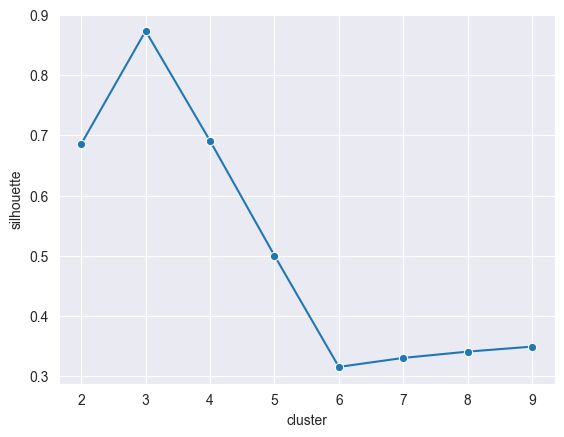

In [13]:

# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = fruits[['x1', 'x2']]
for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Задание 3.3

Для пяти объектов вы провели кластеризацию k-means. Известно, что объекты должны относиться к следующим кластерам: 1, 2, 2, 1, 0. В ходе работы алгоритма вы получили следующие предсказания для каждого элемента: 1, 0, 2, 1, 2.

Рассчитайте метрику однородности полученных кластеров. Введите полученное значение, округлив его до второго знака после точки-разделителя.

In [14]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))
#> 1.0

0.737175493807016


Задание 5.4

Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

In [15]:
# загрузим данные
housing = pd.read_csv('data/housing.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
housing.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


In [24]:
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(housing)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(housing)

<Axes: xlabel='year', ylabel='price'>

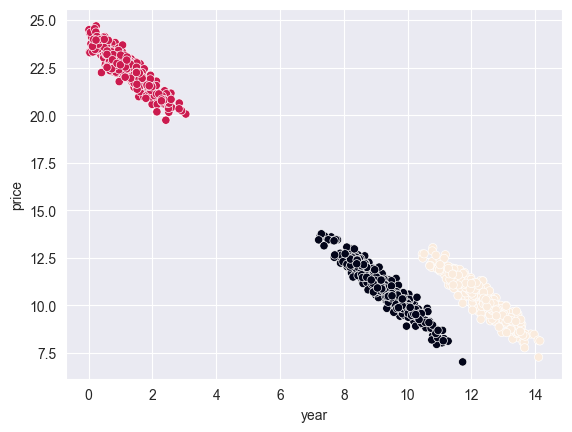

In [25]:
# sns.set_style("white")
sns.scatterplot(x=housing.year, y=housing.price, c=gm_prediction)

Задание 7.5

Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы?

<Axes: xlabel='year', ylabel='price'>

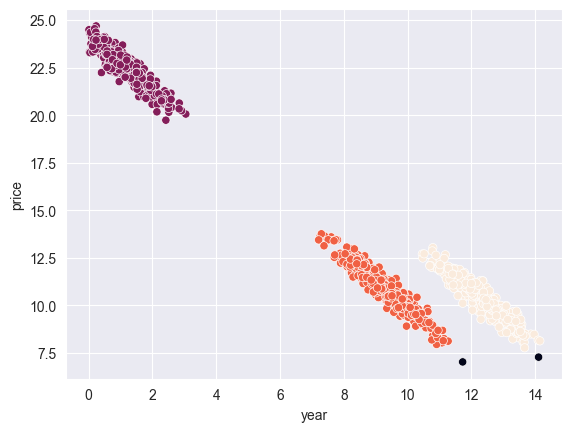

In [26]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN().fit(housing[['year', 'price']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=housing.year, y=housing.price, c=clustering.labels_)

#### Задание 8.4

Для датасета Airbnb проведите иерархическую агломеративную кластеризацию с использованием sklearn. В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

Визуализируйте дендрограмму для проведённой кластеризации. На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

In [29]:
# dawnloading datas
airbnb = pd.read_csv("data/airbnb.csv")

In [32]:
X = airbnb[['latitude', 'longitude']]

# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=6)

# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([3, 0, 1, 3, 1, 0, 3, 0, 1, 0, 1, 0, 3, 1, 0, 2, 3, 0, 2, 1, 2, 3,
       3, 3, 2, 3, 1, 0, 1, 0, 1, 1, 2, 1, 3, 3, 2, 2, 3, 0, 0, 3, 3, 0,
       1, 3, 2, 3, 2, 3, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 3, 3, 0,
       3, 0, 2, 0, 1, 0, 0, 1, 3, 0, 0, 5, 3, 0, 2, 1, 0, 3, 0, 3, 2, 0,
       0, 2, 2, 3, 3, 3, 2, 2, 1, 1, 0, 2, 1, 3, 1, 0, 2, 3, 2, 2, 1, 3,
       0, 3, 0, 3, 0, 0, 2, 0, 0, 3, 1, 3, 0, 0, 3, 2, 0, 1, 3, 1, 3, 0,
       2, 0, 0, 0, 3, 3, 2, 3, 2, 2, 3, 5, 2, 2, 2, 0, 2, 3, 0, 3, 2, 3,
       1, 0, 2, 0, 3, 0, 2, 5, 2, 0, 0, 3, 1, 3, 3, 4, 2, 1, 2, 0, 3, 3,
       0, 1, 0, 1, 3, 5, 1, 2, 3, 2, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 5, 0,
       2, 5, 5, 5, 2, 0, 1, 3, 1, 1, 1, 2, 2, 0, 0, 2, 3, 0, 2, 1, 5, 3,
       0, 0, 0, 0, 1, 1, 3, 0, 0, 5, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 3, 0, 2, 4, 4, 4, 0, 0, 2, 2, 4, 5, 3, 3, 1, 1, 2, 0,
       3, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 3, 3, 2, 0, 0,
       2, 1, 3, 3, 1, 2, 1, 1, 1, 2, 0, 3, 2, 0, 0,

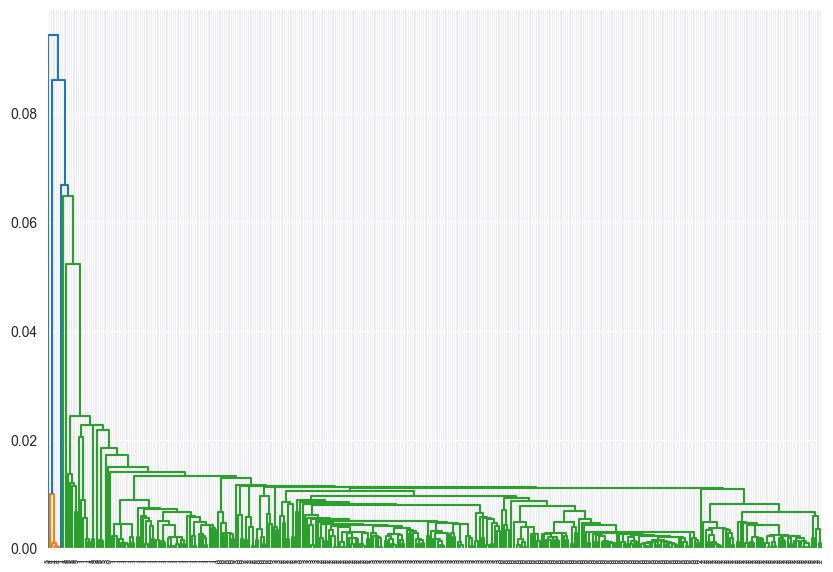

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='0.25',
            show_leaf_counts=True)

plt.show()

Задание 8.5

Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.

Визуализируйте результаты. Сколько кластеров получилось на графике?

<Axes: xlabel='latitude', ylabel='longitude'>

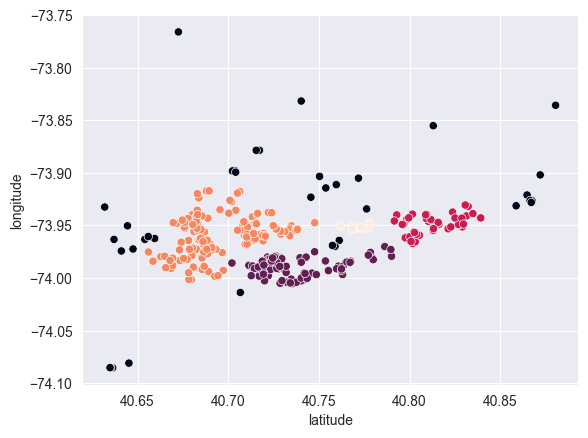

In [37]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.012, min_samples=6).fit(airbnb[['latitude', 'longitude']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=airbnb.latitude, y=airbnb.longitude, c=clustering.labels_)